In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pickle as pkl
mnist = fetch_openml('mnist_784', version=1)


In [3]:
x , y = mnist['data'], mnist['target']
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


8


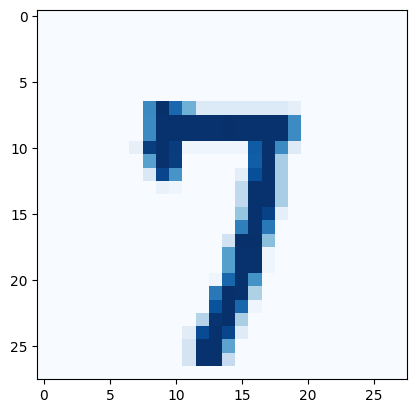

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

some_digit = x.loc[36823]
some_digit = np.array(some_digit)
some_digit_image  = some_digit.reshape(28,28)
print(y[784])
plt.imshow(some_digit_image,cmap='Blues')
plt.show()

In [5]:
# now we want to split the data into training and testing data 
x_train , x_test , y_train , y_test = x[:60000] , x[60000:] , y[:60000] , y[60000:]

In [6]:
shuffle_index = np.random.permutation(60000)
x_train , y_train = x_train.loc[shuffle_index] , y_train.loc[shuffle_index]

In [7]:
# now we want to train a binary classifier 
# first we will turn the data into intger as the data was categorical in the shape of intgers
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)



In [8]:
# now we want to train the model
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x_train , y_train_5)
some_digit_5 = x.loc[36021]
sgd_clf.predict([some_digit_5])

c:\Users\Gaming Store\anaconda3\envs\machine_learn_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [9]:
# now we want to make the predections 
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , recall_score , precision_score
y_pred = sgd_clf.predict(x_test)
print(f"this is the accuracy score {accuracy_score(y_test_5 , y_pred)}")
print(f"this is the classification report {classification_report(y_test_5 , y_pred)}")
print(f"this is the confusion matrix {confusion_matrix(y_test_5 , y_pred)}")
print(f"this is the recall score {recall_score(y_test_5 , y_pred)}")
print(f"this is the precision score {precision_score(y_test_5 , y_pred)}")

this is the accuracy score 0.9645
this is the classification report               precision    recall  f1-score   support

       False       0.99      0.97      0.98      9108
        True       0.77      0.86      0.81       892

    accuracy                           0.96     10000
   macro avg       0.88      0.92      0.90     10000
weighted avg       0.97      0.96      0.97     10000

this is the confusion matrix [[8875  233]
 [ 122  770]]
this is the recall score 0.8632286995515696
this is the precision score 0.7676969092721835


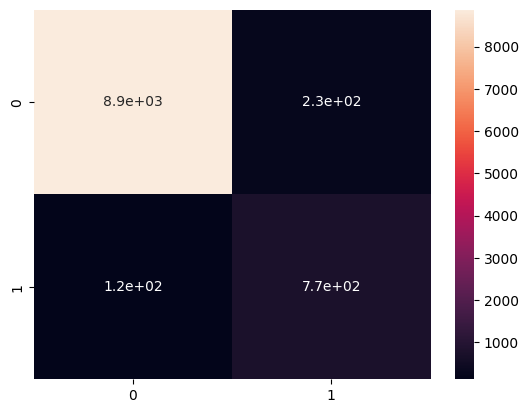

In [10]:
# now i want to produce the heat map of the confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test_5 , y_pred) , annot = True)
plt.show()

In [11]:
# now we want to see the decision threshold and the preccison and recall trade off

y_scores = sgd_clf.decision_function([some_digit_5])
print(y_scores)
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[-12733.44267861]
[False]


c:\Users\Gaming Store\anaconda3\envs\machine_learn_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [12]:
# we wan to decide which threshold to use 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf , x_train , y_train_5 , cv = 3 , method = 'decision_function')
precisons , recalls, thresholds = precision_recall_curve(y_train_5 , y_scores)

def plot_precision_recall_vs_threshold(precisons , recalls , thresholds):
    plt.plot(thresholds , precisons[:-1] , 'b--' , label = 'Precision')
    plt.plot(thresholds , recalls[:-1] , 'g-' , label = 'Recall')
    plt.xlabel('Threshold')
    plt.legend(loc = 'upper left')
    plt.ylim([0,1])

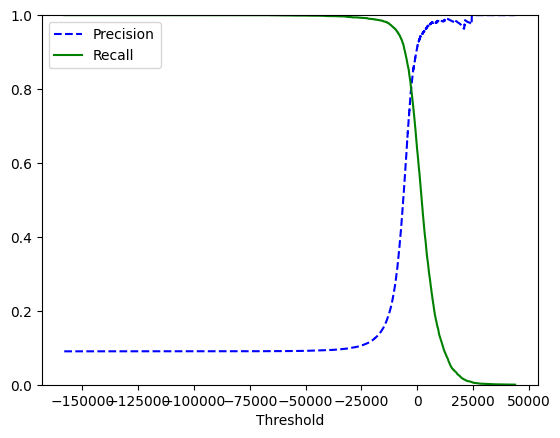

In [13]:
plot_precision_recall_vs_threshold(precisons , recalls , thresholds)

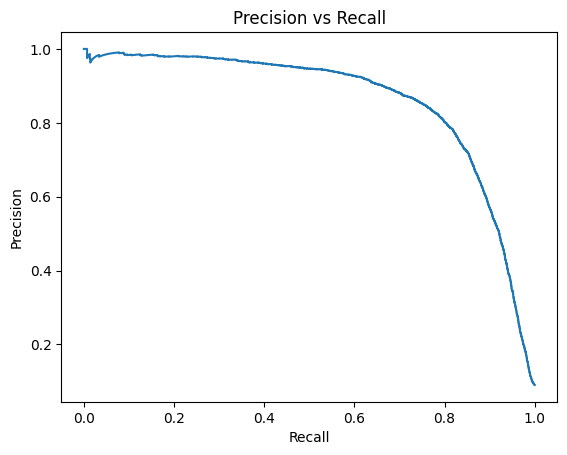

In [14]:
# now we want to plot the precision vs recall curve
plt.plot(recalls , precisons)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.show()

C:\Users\Gaming Store\AppData\Local\Temp\ipykernel_19960\495607754.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


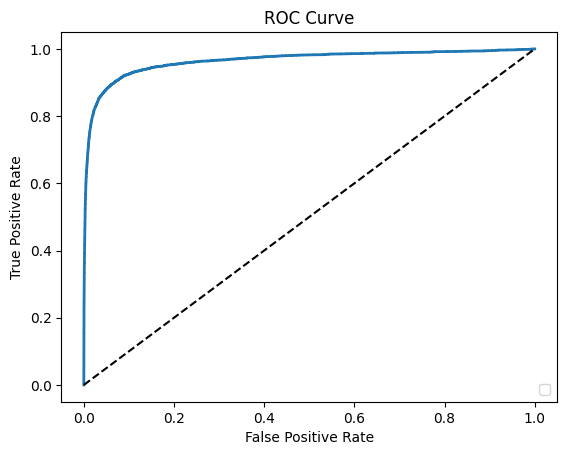

this is the roc auc score 0.9647479780320026


In [15]:
# ROC curve 
from sklearn.metrics import roc_curve , roc_auc_score

def plot_ROC_CURVE(fpr,tpr, label:str = None): 
    plt.plot(fpr , tpr , linewidth = 2, label = label)
    plt.plot([0,1] , [0,1] , 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

fpr , tpr , thresholds = roc_curve(y_train_5 , y_scores)
plot_ROC_CURVE(fpr , tpr)
plt.show()
print(f"this is the roc auc score {roc_auc_score(y_train_5 , y_scores)}")

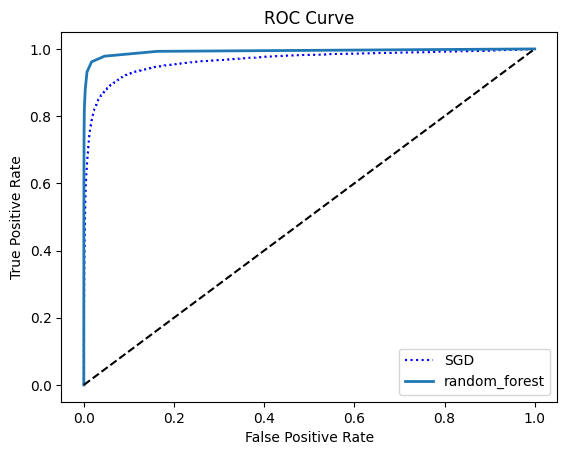

In [16]:
# now we want to train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10,random_state = 42)
y_probas_forest = cross_val_predict(random_forest , x_train  , y_train_5  , cv  = 3  , method="predict_proba")
y_scores = y_probas_forest[:,1] # score = proba of positive class
fpr_forest , tpr_forest , thresholds_forest = roc_curve(y_train_5  , y_scores)
plt.plot(fpr  , tpr  , "b:", label="SGD")
plot_ROC_CURVE(fpr_forest ,tpr_forest,'random_forest' )
plt.legend(loc='lower right')
plt.show()

## multiclass classfication

In [17]:
# binary classifcation automatically runs OvR or OvO strategy for you
# which is is called one verus all strategy.
# so when we try to train the SGDClassifier for multi
#SGDClassifier for multiclass classification, it will internally run OvR strategy.
# sgd_clf.fit(x_train, y_train )
print(sgd_clf.predict([some_digit]))

[False]


c:\Users\Gaming Store\anaconda3\envs\machine_learn_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [18]:
# the scores for each of the 10 classifier 
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores )

[-6365.96450932]


c:\Users\Gaming Store\anaconda3\envs\machine_learn_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [19]:
# evaluate the accuracy of the model using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train , y_train   , cv=3, scoring="accuracy")

array([0.8585 , 0.88355, 0.85205])

In [20]:
# as we want to improve this accuracy we will scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
cross_val_score(sgd_clf,x_train_scaled , y_train , cv=3 , scoring="accuracy")

array([0.90245, 0.90015, 0.90085])

##  error analysis

In [21]:
# training the model after scaling the data and creating the confusion matrix
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled , y_train , cv=3)
conf_matrix = confusion_matrix(y_train , y_train_pred )

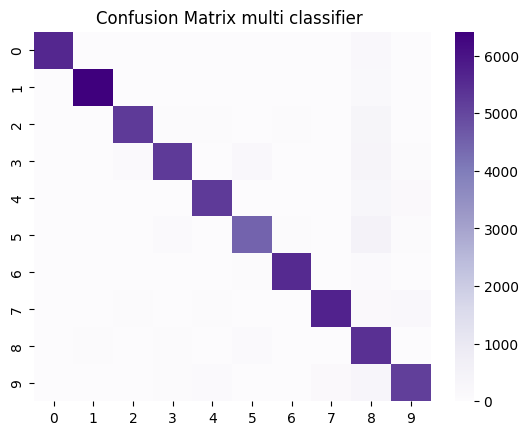

In [22]:
# visualizing the confusion matrix using heatmap
sns.heatmap(conf_matrix  , cmap="Purples", cbar=True )
plt.title("Confusion Matrix multi classifier ")
plt.show()

<Axes: >

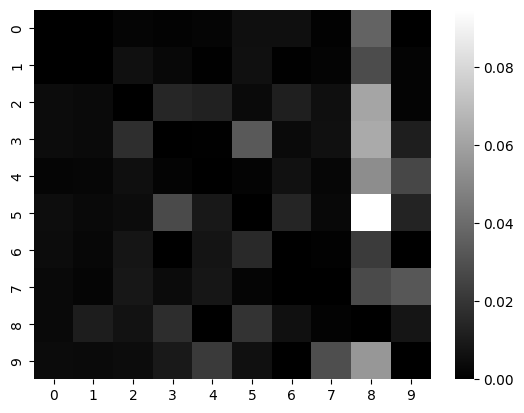

In [23]:
# as we see the 5 column is not as good as the others 
# which may have two meanings one is that the model is not good at detecting 5s
# two there is not many 5s in the dataset  
# so we need to settle this down 
row_sums = conf_matrix.sum(axis=1 , keepdims=True )
norm_conf_matrix = conf_matrix / row_sums
np.fill_diagonal(norm_conf_matrix , 0 )
sns.heatmap(norm_conf_matrix   , cmap=plt.cm.gray, cbar=True )

length of instance:25 + and the n_rows is 5 + images per row is 5
(140, 140)
length of instance:25 + and the n_rows is 5 + images per row is 5
(140, 140)
length of instance:25 + and the n_rows is 5 + images per row is 5
(140, 140)
length of instance:25 + and the n_rows is 5 + images per row is 5
(140, 140)


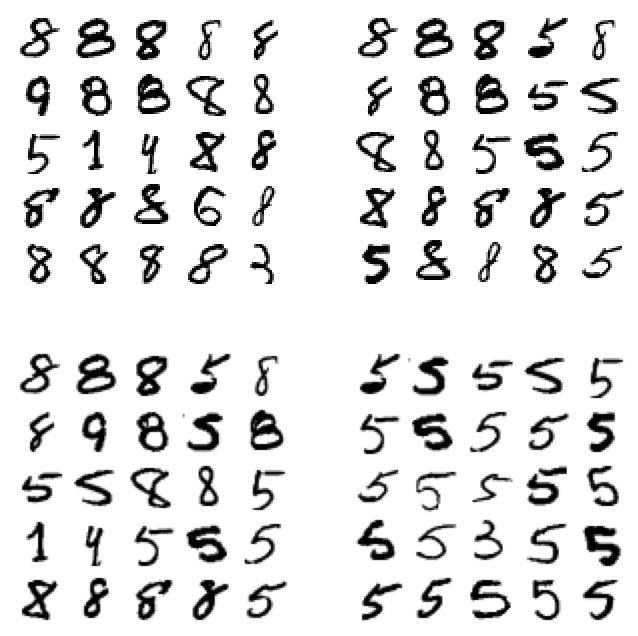

In [24]:
# now we are gonna manully configure the misclassified 5s to 8s
# EXTRA
def plot_digits(instances, images_per_row, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [np.array(instances.iloc[i]).reshape(28, 28) for i in range (len(instances))]

    ########
    if images_per_row == 0:
       images_per_row = 0.1
    else:
        images_per_row = images_per_row
        pass
    ########

    n_rows = (len(instances) - 1) // images_per_row  + 1
    print(f"length of instance:{len(instances) } + and the n_rows is {n_rows} + images per row is {images_per_row}")
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
        
    image = np.concatenate(row_images, axis=0)
    print(image.shape)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
cl_a, cl_b = 8,5
X_aa = x_train[(y_train == cl_a) | (y_train_pred == cl_a)]
X_ab = x_train[(y_train == cl_a) | (y_train_pred == cl_b)]
X_ba = x_train[(y_train == cl_b) | (y_train_pred == cl_a)]
X_bb = x_train[(y_train == cl_b) | (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [25]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >=7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

knn_clf.predict([some_digit])

c:\Users\Gaming Store\anaconda3\envs\machine_learn_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[ True,  True]])

In [26]:
# making a classifier that somehow removes the noise from the image
import random as rnd
noise = np.random.randint(0,100, size = (len(x_train),784))
noise_test = np.random.randint(0,100,size=(len(x_test),784))
x_train_mod = x_train + noise
